Importacion de librerias

In [138]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Carga de los datasets

In [139]:
#importación de ficheros Excel 
df_orders = pd.read_excel('../Datos/orders.xlsx', engine='openpyxl')
df_food = pd.read_excel('../Datos/food.xlsx', engine='openpyxl')
df_menu = pd.read_excel('../Datos/menu.xlsx', engine='openpyxl')
df_restaurant = pd.read_excel('../Datos/restaurant.xlsx', engine='openpyxl')
df_users = pd.read_excel('../Datos/users.xlsx', engine='openpyxl')





Exploracion inicial de los diferentes datasets

df_food

In [140]:
# Exploración inicial de los datos df_food
df_food.info()
df_food.sample(5)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 371560 entries, 0 to 371559
Data columns (total 3 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   f_id            371552 non-null  object
 1   item            371552 non-null  object
 2   veg_or_non_veg  371552 non-null  object
dtypes: object(3)
memory usage: 8.5+ MB


,f_id,item,veg_or_non_veg
270989,fd745502,Strawberry Cold Coffee,Veg
307267,fd848354,Porotta With Ayala Mulakittathu,Non-veg
74347,fd151451,Com Capsicum S/W Grilled,Veg
355167,fd990474,Chocolate Delight Waffles 4',Veg
16734,fd31758,Classic Margherita Pizza,Veg


In [141]:
#comprobamos si hay valores nulos
print(df_food.isnull().sum())
#comprobamos si hay valores repetidos
print(df_food.duplicated().sum())
#comprobamos cuantas valores unicos hay en cada columna
print(df_food.nunique())



f_id              8
item              8
veg_or_non_veg    8
dtype: int64
7
f_id              371552
item              369347
veg_or_non_veg         2
dtype: int64


In [142]:
#visualizacion de las filas donde hay valores nulos en df_food
print(df_food[df_food.isnull().any(axis=1)])


       f_id item veg_or_non_veg
13540   NaN  NaN            NaN
99966   NaN  NaN            NaN
99988   NaN  NaN            NaN
99989   NaN  NaN            NaN
99991   NaN  NaN            NaN
99993   NaN  NaN            NaN
99994   NaN  NaN            NaN
166711  NaN  NaN            NaN


df_menu

In [143]:
# Exploración inicial de los datos df_menu
df_menu.info()
df_menu.sample(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 5 columns):
 #   Column   Non-Null Count    Dtype  
---  ------   --------------    -----  
 0   menu_id  1048575 non-null  object 
 1   r_id     1048575 non-null  int64  
 2   f_id     1048575 non-null  object 
 3   cuisine  1048575 non-null  object 
 4   price    1048574 non-null  float64
dtypes: float64(1), int64(1), object(3)
memory usage: 40.0+ MB


,menu_id,r_id,f_id,cuisine,price
21470,mn460289,209749,fd47267,"Chinese,Bakery",49.0
974408,mn603226,372369,fd603226,"Beverages,Snacks",265.0
749881,mn180670,42313,fd180670,"Punjabi,Indian",145.0
109984,mn344045,527253,fd47109,"North Indian,Fast Food",150.0
736718,mn203893,337003,fd167048,"Snacks,Beverages",90.0
494340,mn445158,542674,fd32998,"Pizzas,Fast Food",85.0
86880,mn252539,496198,fd805,"Indian,Chinese",240.0
728613,mn866592,542945,fd159085,"Healthy Food,Home Food",179.0
486129,mn233979,531472,fd30104,"Pizzas,Beverages",150.0
298846,mn1039904,26647,fd4724,"North Indian,Rajasthani",80.0


In [144]:
#visualizacion de las filas donde hay valores nulos en df_menu
print(df_menu[df_menu.isnull().any(axis=1)])


         menu_id    r_id      f_id       cuisine  price
878051  mn414862  496987  fd413746  South Indian    NaN


In [145]:
#comprobamos si hay valores nulos
print(df_menu.isnull().sum())
#comprobamos si hay valores repetidos
print(df_menu.duplicated().sum())
#comprobamos cuantas valores unicos hay en cada columna
print(df_menu.nunique())


menu_id    0
r_id       0
f_id       0
cuisine    0
price      1
dtype: int64
0
menu_id    918168
r_id        12117
f_id       282381
cuisine      1436
price        3308
dtype: int64


In [146]:
#comprobamos la cantidad de restaurantes que tienen el mismo menu_id
print(df_menu['menu_id'].value_counts())

menu_id
mn949133    2
mn778917    2
mn916630    2
mn778910    2
mn69201     2
           ..
mn839251    1
mn780169    1
mn780167    1
mn780166    1
mn780151    1
Name: count, Length: 918168, dtype: int64


In [147]:
#comprobamos la fila que tiene un valor nulo en price
print(df_menu[df_menu['price'].isnull()])


         menu_id    r_id      f_id       cuisine  price
878051  mn414862  496987  fd413746  South Indian    NaN


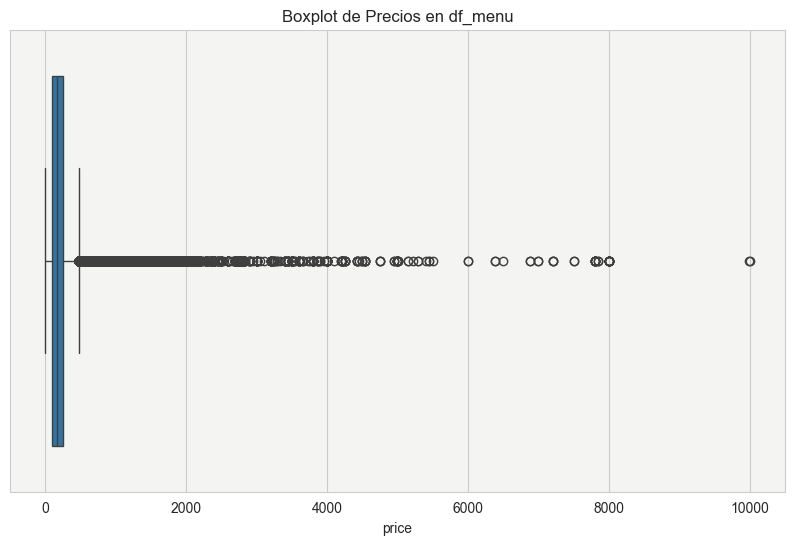

In [148]:
#visualizacion de outliers en la columna price de df_menu
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_menu['price'])
plt.title('Boxplot de Precios en df_menu')
plt.show()




In [149]:
#informacion de medias, mediana, moda, desviaciones estandar, minimos, maximos y percentiles de la columna price en df_menu
print(df_menu['price'].describe())
print("Moda de price:", df_menu['price'].mode()[0])
print("Mediana de price:", df_menu['price'].median())



count    1.048574e+06
mean     1.969102e+02
std      1.705025e+02
min      0.000000e+00
25%      1.000000e+02
50%      1.600000e+02
75%      2.490000e+02
max      9.999000e+03
Name: price, dtype: float64
Moda de price: 120.0
Mediana de price: 160.0


df_orders

In [150]:
# Exploración inicial de los datos df_orders
df_orders.info()
df_orders.sample(5)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150281 entries, 0 to 150280
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_date    150281 non-null  datetime64[ns]
 1   sales_qty     150281 non-null  int64         
 2   sales_amount  150281 non-null  int64         
 3   currency      150281 non-null  object        
 4   user_id       150281 non-null  int64         
 5   r_id          148664 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(1)
memory usage: 6.9+ MB


,order_date,sales_qty,sales_amount,currency,user_id,r_id
147135,2017-11-23,1,1796,INR,78802,450387.0
81674,2018-08-17,1,144,INR,89621,451002.0
97578,2019-05-31,1,60,INR,76949,74282.0
47870,2020-03-23,4,319,INR,5626,536860.0
104318,2020-01-31,1,625,INR,56637,110064.0


In [151]:
#comprobamos los valores nulos
print(df_orders.isnull().sum())
#comprobamos los valores duplicados
print(df_orders.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_orders.nunique())


order_date         0
sales_qty          0
sales_amount       0
currency           0
user_id            0
r_id            1617
dtype: int64
0
order_date         806
sales_qty          566
sales_amount      7983
currency             1
user_id          77929
r_id            148541
dtype: int64


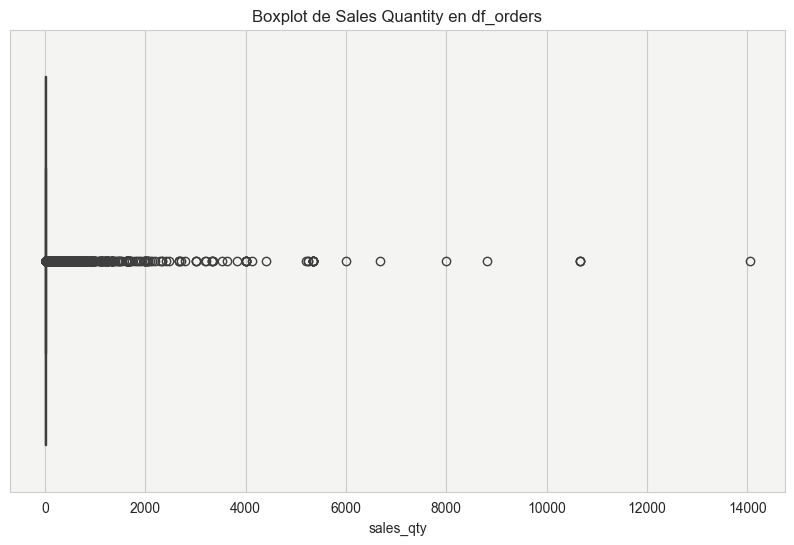

count    150281.000000
mean         16.264997
std         114.761496
min           1.000000
25%           1.000000
50%           1.000000
75%           7.000000
max       14049.000000
Name: sales_qty, dtype: float64
Moda de sales_qty: 1


In [152]:
#visualizacion de outliers en la columna sales_qty de df_orders
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_orders['sales_qty'])
plt.title('Boxplot de Sales Quantity en df_orders')
plt.show()
#informacion de medias, mediana, moda, desviaciones estandar, minimos, maximos y percentiles de la columna sales_qty en df_orders
print(df_orders['sales_qty'].describe())
print("Moda de sales_qty:", df_orders['sales_qty'].mode()[0])


 


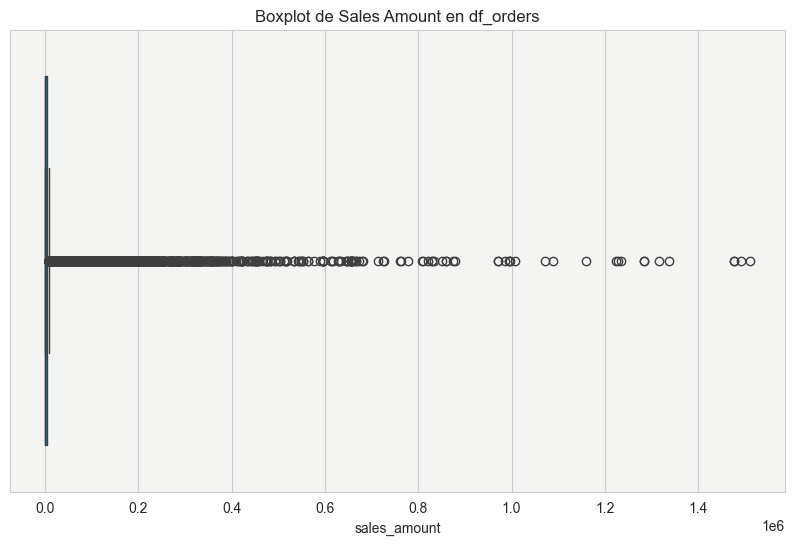

count    1.502810e+05
mean     6.564802e+03
std      2.991743e+04
min     -1.000000e+00
25%      1.710000e+02
50%      5.090000e+02
75%      3.000000e+03
max      1.510944e+06
Name: sales_amount, dtype: float64


In [153]:
#visualizacion de outliers en la columna sales_amount de df_orders
plt.figure(figsize=(10, 6))
sns.boxplot(x=df_orders['sales_amount'])
plt.title('Boxplot de Sales Amount en df_orders')
plt.show()
#informacion de medias, desviaciones estandar, minimos, maximos y percentiles de la columna sales_amount en df_orders
print(df_orders['sales_amount'].describe())


In [154]:
# comprobamos si existe el valor 0 en sales_amount
print(df_orders[df_orders['sales_amount'] == 0])
# comprobamos la cantidadde valor 0 en sales_amount
print("Cantidad de filas con sales_amount 0:", df_orders[df_orders['sales_amount'] == 0].shape[0])
# eliminamos las filas con sales_amount 0
df_orders = df_orders[df_orders['sales_amount'] != 0]


       order_date  sales_qty  sales_amount currency  user_id      r_id
112    2017-11-15       1267             0      INR    22145  381392.0
511    2018-07-03        474             0      INR    27050  482808.0
690    2018-08-28        381             0      INR     3173  389305.0
1131   2019-07-23        268             0      INR    61028  568007.0
1246   2019-02-18        256             0      INR    69436  421839.0
...           ...        ...           ...      ...      ...       ...
149409 2019-07-15          1             0      INR      976       NaN
149427 2019-07-25          1             0      INR    95701       NaN
149460 2019-08-16          1             0      INR    13971       NaN
149498 2019-09-09          1             0      INR    21153       NaN
149613 2019-11-19          1             0      INR    64848       NaN

[1609 rows x 6 columns]
Cantidad de filas con sales_amount 0: 1609


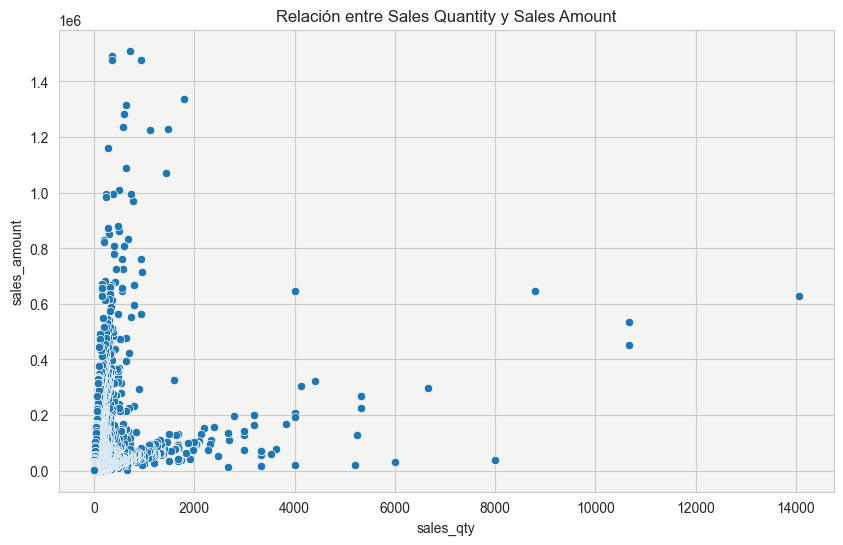

In [155]:
#corelacion entre sales_qty y sales_amount en df_orders
plt.figure(figsize=(10, 6))
sns.scatterplot(x='sales_qty', y='sales_amount', data=df_orders)
plt.title('Relación entre Sales Quantity y Sales Amount')
plt.show()


In [156]:
#fecha de pedido minima y maxima en df_orders
print("Fecha de pedido mínima:", df_orders['order_date'].min())
print("Fecha de pedido máxima:", df_orders['order_date'].max())


Fecha de pedido mínima: 2017-10-04 00:00:00
Fecha de pedido máxima: 2020-06-26 00:00:00


df_restaurant

In [157]:
# Exploración inicial de los datos df_restaurant
df_restaurant.info()
df_restaurant.sample(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148540 entries, 0 to 148539
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            148540 non-null  int64 
 1   name          148454 non-null  object
 2   Country       148540 non-null  object
 3   city          148540 non-null  object
 4   rating        148454 non-null  object
 5   rating_count  148454 non-null  object
 6   cuisine       148441 non-null  object
 7   link          148540 non-null  object
 8   address       148454 non-null  object
dtypes: int64(1), object(8)
memory usage: 10.2+ MB


,id,name,Country,city,rating,rating_count,cuisine,link,address
78780,423514,Oven Story Pizza,India,"Santoshnagar & Saidabad,Hyderabad",3.9,100+ ratings,Pizzas,https://www.swiggy.com/restaurants/oven-story-...,"Oven Story Pizza, No:54 SY No:140 & 142/1,NEW ..."
46112,434449,The Roof Restaurant,India,Cooch-behar,2.9,20+ ratings,"Chinese,Biryani",https://www.swiggy.com/restaurants/the-roof-re...,"The Roof Restaurant, Binoy Sarkar Rd, North, C..."
7228,417175,Vishwa s Dine In,India,Anantapur,--,Too Few Ratings,"Chinese,Biryani",https://www.swiggy.com/restaurants/vishwa-s-di...,"Vishwa s Dine In, #12-2-287 , 80 feet road , A..."
91107,532856,NABABO KI BIRYANI(ORBITEDGE FOODS PVT. LTD),India,"Chinar Park,Kolkata",--,Too Few Ratings,"Snacks,Indian",https://www.swiggy.com/restaurants/nababo-ki-b...,"NABABO KI BIRYANI(ORBITEDGE FOODS PVT. LTD), M..."
10911,543354,Biryani Hazir Ho,India,"Mahadevpura,Bangalore",--,Too Few Ratings,"Biryani,North Indian",https://www.swiggy.com/restaurants/biryani-haz...,"Biryani Hazir Ho, 11B, SY No 40/9Devasandra In..."
21935,337642,Bangalore Agarwal Bhavan,India,"Electronic City,Bangalore",4.1,100+ ratings,"Sweets,Fast Food",https://www.swiggy.com/restaurants/bangalore-a...,"Bangalore Agarwal Bhavan, No. 1213. Vishwa Pea..."
16465,340097,The Cuboidal,India,"BTM,Bangalore",--,Too Few Ratings,"Pizzas,Pastas",https://www.swiggy.com/restaurants/the-cuboida...,"The Cuboidal, The Cuboidal - House of Milkshak..."
56513,255588,Cake Sarovar,India,"Chattarpur,Delhi",--,Too Few Ratings,Bakery,https://www.swiggy.com/restaurants/cake-sarova...,"Cake Sarovar, G - 3 sushant shopping arcade se..."
1709,63626,Jay Bhavani Vadapav,India,"GOTA,Ahmedabad",4,100+ ratings,Snacks,https://www.swiggy.com/restaurants/jay-bhavani...,"Jay Bhavani Vadapav, Block - B, Shop 11, Krish..."
33648,123397,The Royal King,India,"South Chd,Chandigarh",3.2,50+ ratings,"North Indian,Thalis",https://www.swiggy.com/restaurants/the-royal-k...,"The Royal King, Shop No 2212/02, Pipliwala tow..."


In [158]:
#comprobamos los valores nulos
print(df_restaurant.isnull().sum())
#comprobamos los valores duplicados
print(df_restaurant.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_restaurant.nunique())



id               0
name            86
Country          0
city             0
rating          86
rating_count    86
cuisine         99
link             0
address         86
dtype: int64
0
id              148540
name            112817
Country              1
city               821
rating              42
rating_count         8
cuisine           2132
link            148540
address         148400
dtype: int64


In [159]:
# percentajes por columna de valores nulos en df_restaurant
nulos_restaurant = df_restaurant.isnull().sum()
percent_nulos_restaurant = (nulos_restaurant / len(df_restaurant)) * 100
print(percent_nulos_restaurant)


id              0.000000
name            0.057897
Country         0.000000
city            0.000000
rating          0.057897
rating_count    0.057897
cuisine         0.066649
link            0.000000
address         0.057897
dtype: float64


In [160]:
#visualizacion de un sample de las filas donde hay valores nulos en la columna name en df_restaurant
print(df_restaurant[df_restaurant['name'].isnull()].sample(5))
print(df_restaurant[df_restaurant['name'].isnull()])



            id name Country             city rating rating_count cuisine  \
137613  116615  NaN   India       Shivamogga    NaN          NaN     NaN   
98633   360264  NaN   India      Kurukshetra    NaN          NaN     NaN   
115560   54237  NaN   India  Raj Nagar,Noida    NaN          NaN     NaN   
117862  511401  NaN   India        North-goa    NaN          NaN     NaN   
71075   165684  NaN   India       Hoshiarpur    NaN          NaN     NaN   

                                                     link address  
137613  https://www.swiggy.com/restaurants/bakers-bowl...     NaN  
98633   https://www.swiggy.com/restaurants/radha-krish...     NaN  
115560  https://www.swiggy.com/restaurants/ravi-bati-c...     NaN  
117862  https://www.swiggy.com/restaurants/zwe-by-gold...     NaN  
71075   https://www.swiggy.com/restaurants/special-sha...     NaN  
            id name Country                       city rating rating_count  \
31044   397961  NaN   India  Greater Mohali,Chandigarh   

In [161]:
#comprobamos cuantos valores maxima hay en la columna cuisine
print(df_restaurant['cuisine'].value_counts().head(20))


cuisine
North Indian,Chinese    6471
Indian                  6414
Chinese                 5051
North Indian            4775
Indian,Chinese          4374
South Indian            3303
Bakery                  3132
Chinese,Indian          2308
Chinese,North Indian    2288
Bakery,Desserts         2233
Biryani                 2227
Pizzas                  2215
Beverages               2157
North Indian,Indian     2004
Snacks                  1788
Fast Food               1671
Biryani,North Indian    1644
Chinese,Snacks          1622
Fast Food,Snacks        1601
Ice Cream,Desserts      1577
Name: count, dtype: int64


In [162]:
#comprobamos cuantos valores maxima hay en cada celda de la columna cuisine
# descartamos los valores nulos antes de aplicar len para evitar TypeError
print(df_restaurant['cuisine'].dropna().str.split(',').apply(len).value_counts())
# cuantas valores unicas hay en total en cada celda de la columna cuisine
unique_cuisines = set()
for cuisines in df_restaurant['cuisine'].dropna():
    for cuisine in cuisines.split(','):
        unique_cuisines.add(cuisine.strip())
print(f'Total unique cuisines: {len(unique_cuisines)}')
print(f'Unique cuisines: {unique_cuisines}')

cuisine
2    108069
1     40372
Name: count, dtype: int64
Total unique cuisines: 126
Unique cuisines: {'Popular Brand Store', 'Indonesian', 'Haleem', 'Bihari', 'Australian', 'Tibetan', 'South Indian', 'Lebanese', 'Tex-Mex', 'Indian', 'Oriya', 'Healthy Food', 'German', 'Pizzas', 'Waffle', 'Middle Eastern', 'American', 'French', 'Bakery products', 'Continental', 'Chinese', 'Gujarati', 'Lucknowi', 'North Indian', 'Afghani', 'South American', 'Sushi', 'Turkish', 'Grill', 'North Eastern', 'Bhutanese', 'Konkan', 'Khasi', 'Malaysian', 'Thalis', 'Paan', 'Mongolian', 'Hyderabadi', 'Beverages', 'Bangladeshi', 'African', 'Assamese', 'Parsi', 'Tribal', '8:15 To 11:30 Pm', 'Steakhouse', 'Ice Cream', 'Rayalaseema', 'Jain', 'Italian-American', 'Default', 'Discount offer from Garden Cafe Express Kankurgachi', 'Barbecue', 'Snacks', 'Malwani', 'BEVERAGE', 'Sweets', 'Japanese', 'Keto', 'Bowl Company', 'Biryani - Shivaji Military Hotel', 'Desserts', 'SVANidhi Street Food Vendor', 'Singaporean', 'Attractiv

df_users

In [163]:
# Exploración inicial de los datos df_users
df_users.info()
df_users.sample(30)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   user_id         100000 non-null  int64 
 1   name            100000 non-null  object
 2   Age             100000 non-null  int64 
 3   Gender          100000 non-null  object
 4   Marital Status  100000 non-null  object
 5   Occupation      100000 non-null  object
dtypes: int64(2), object(4)
memory usage: 4.6+ MB


,user_id,name,Age,Gender,Marital Status,Occupation
29245,29246,Mindy Wheeler,25,Male,Single,Employee
62317,62318,Bryan Paul,24,Male,Single,Student
56279,56280,Jordan Griffith,21,Female,Single,Student
21411,21412,Shelley Walsh,24,Female,Single,Student
35150,35151,Melissa Cain,29,Male,Single,Self Employeed
90557,90558,Greg Weiss,21,Male,Single,Student
23908,23909,Jonathan Walker,32,Male,Married,Employee
51946,51947,Julie Jacobson,22,Male,Married,Self Employeed
76135,76136,Derrick Campbell,25,Male,Single,Student
10981,10982,Jackie Wilson,24,Male,Prefer not to say,Self Employeed


In [164]:
#comprobamos los valores nulos
print(df_users.isnull().sum())
#comprobamos los valores duplicados
print(df_users.duplicated().sum())
#comprobamos los valores unicos en cada columna
print(df_users.nunique())


user_id           0
name              0
Age               0
Gender            0
Marital Status    0
Occupation        0
dtype: int64
0
user_id           100000
name               71251
Age                   16
Gender                 2
Marital Status         3
Occupation             4
dtype: int64


In [165]:
#compromamos el rango de edades en la columna age en df_users
print("Edad mínima:", df_users['Age'].min())
print("Edad máxima:", df_users['Age'].max())


Edad mínima: 18
Edad máxima: 33


Limpieza por dataset

Restaurantes

In [166]:
#df_restaurant
#eliminacion de las filas con valores nulos en la columna name de df_restaurant
df_restaurant = df_restaurant.dropna(subset=['name'])

#eliminacion de las filas con direccion duplicada
df_restaurant = df_restaurant.drop_duplicates(subset=['address'], keep='first')

#cambio de nombre de la columna id de df_restaurant a r_id para posterior combinacion
df_restaurant = df_restaurant.rename(columns={'id': 'r_id'})

#cambio de los valores '--' en la columna rating a valor Null
df_restaurant.replace("--", np.nan, inplace=True)

#cambio de tipo de dato de la columna rating de object a float
df_restaurant['rating'] = df_restaurant['rating'].astype(float)

#cambio de nombre de la columna name a r_name en df_restaurant
df_restaurant = df_restaurant.rename(columns={'name': 'r_name'})

#eliminacion de las columnas country, link y address de df_restaurant
df_restaurant = df_restaurant.drop(columns=['Country', 'link', 'address'])

#comprobacion de los cambios realizados en df_restaurant
df_restaurant.info()
df_restaurant.sample(5)


<class 'pandas.core.frame.DataFrame'>
Index: 148400 entries, 0 to 148539
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   r_id          148400 non-null  int64  
 1   r_name        148400 non-null  object 
 2   city          148400 non-null  object 
 3   rating        61425 non-null   float64
 4   rating_count  148400 non-null  object 
 5   cuisine       148387 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 7.9+ MB


C:\Users\sebas\AppData\Local\Temp\ipykernel_16320\1519023198.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_restaurant.replace("--", np.nan, inplace=True)


,r_id,r_name,city,rating,rating_count,cuisine
38178,339688,Bun kebab,"Royapettah,Chennai",NaN,Too Few Ratings,"Kebabs,Beverages"
77394,435003,SPICY N SPICE,"Madhapur,Hyderabad",NaN,Too Few Ratings,"Indian,Chinese"
75384,471492,Chennapatnam,"Gachibowli,Hyderabad",NaN,Too Few Ratings,"South Indian,Biryani"
128609,346909,THE MOMO PANDA,"PCMC,Pune",4.0,50+ ratings,Indian
52320,332965,Sahil Restaurant,"South Extension,Delhi",NaN,Too Few Ratings,"Chinese,North Indian"


In [167]:
#creamos 2 nuevas columnas cuisine_1 y cuisine_2 para separar los tipos de cocina cuando hay mas de un tipo de cocina
df_restaurant[['cuisine_1', 'cuisine_2']] = df_restaurant['cuisine'].str.split(',', n=1, expand=True)
#quitamos espacios en blanco al inicio y al final de los valores en las nuevas columnas
df_restaurant['cuisine_1'] = df_restaurant['cuisine_1'].str.strip()
df_restaurant['cuisine_2'] = df_restaurant['cuisine_2'].str.strip()
#quitmos la columna cuisine original
df_restaurant = df_restaurant.drop(columns=['cuisine'])
df_restaurant.head(5)

,r_id,r_name,city,rating,rating_count,cuisine_1,cuisine_2
0,567335,AB FOODS POINT,Abohar,NaN,Too Few Ratings,Beverages,Pizzas
1,531342,Janta Sweet House,Abohar,4.4,50+ ratings,Sweets,Bakery
2,158203,theka coffee desi,Abohar,3.8,100+ ratings,Beverages,None
3,187912,Singh Hut,Abohar,3.7,20+ ratings,Fast Food,Indian
4,543530,GRILL MASTERS,Abohar,NaN,Too Few Ratings,Italian-American,Fast Food


In [168]:
def categorize_cuisine(row):
    # Convertimos a minúsculas para evitar problemas de mayúsculas/minúsculas
    cuisine_1 = str(row['cuisine_1']).strip().lower()
    cuisine_2 = str(row['cuisine_2']).strip().lower()
    
    # Definimos categorías basadas en los tipos de cocina (también en minúsculas)
    categories = {
        'Italian': ['italian', 'pizza', 'pasta', 'mediterranean', 'pastas', 'pizzas'],
        'Asian': ['chinese', 'dim sum', 'szechuan', 'asian', 'tibetan', 'thai', 'oriental', 'burmese', 'korean', 'malaysian', 'singaporean',
                   'vietnamese', 'noodles', 'nepalese', 'pan-asian'],
        'Indian': ['indian', 'curry', 'tandoori', 'punjabi', 'bengali', 'gujarati', 'rajasthani', 'maharashtrian', 'kerala', 'chettinad', 
                   'mughlai', 'hyderabadi', 'biryani', 'tandoor', 'thali', 'chaat', 'north indian', 'south indian', 'thalis', 'North Indian',
                     'naga', 'bihari', 'north eastern', 'andhra', 'parsi', 'goan', 'haleem', 'assamese', 'mangalorean', 'malwani'],
        'Mexican': ['mexican', 'tacos', 'burritos'],
        'Fast Food': ['fast food', 'burgers', 'fries', 'snacks', 'snack', 'street food', 'combo'],
        'Japanese': ['japanese', 'sushi', 'ramen'],
        'Fish and Seafood': ['seafood', 'fish', 'coastal'],
        'Vegetarian': ['vegetarian', 'vegan'],
        'Desserts': ['desserts', 'ice cream', 'bakery', 'sweets', 'paan', 'bakery products', 'waffles', 'waffle', 'ice cream cakes'],
        'Beverage': ['cafe', 'coffee', 'tea', 'juice', 'beverages', 'juices'],
        'American': ['american', 'steakhouse', 'bbq', 'grill', 'barbecue', 'italian-american'],
        'European': ['french', 'bistro', 'crepes', 'european', 'continental', 'continental food'],
        'Middle Eastern': ['middle eastern', 'lebanese', 'persian', 'arabian', 'shawarma', 'kebab', 'afghani', 'turkish', 'kebabs'],
        'Healthy': ['healthy', 'salads', 'organic', 'gluten free', 'salad', 'healthy food'],
        
    }
    
    for category, cuisines in categories.items():
        if cuisine_1 in cuisines or cuisine_2 in cuisines:
            return category
    return 'Other'

In [169]:
#contamos los valores de la nueva columna cuisine_category
df_restaurant['cuisine_category'] = df_restaurant.apply(categorize_cuisine, axis=1)
print(df_restaurant['cuisine_category'].value_counts())
df_restaurant.sample(5)

cuisine_category
Indian              55909
Asian               36260
Desserts            17020
Fast Food           16356
Italian             14270
Beverage             4614
American             1213
Middle Eastern        924
Healthy               621
European              614
Mexican               314
Fish and Seafood      122
Japanese               87
Other                  76
Name: count, dtype: int64


,r_id,r_name,city,rating,rating_count,cuisine_1,cuisine_2,cuisine_category
87503,210619,Arun Misthan Bhandar,Katihar,4.2,100+ ratings,Sweets,None,Desserts
66372,52727,Raina Di Hatti,"Greenfields_FBD,Gurgaon",4.1,1K+ ratings,North Indian,Chinese,Asian
45350,398733,Bombay kulfi,"Sai Baba Colony,Coimbatore",NaN,Too Few Ratings,Ice Cream,None,Desserts
12802,537586,Iceberg Organic Icecreams,"Indiranagar,Bangalore",NaN,Too Few Ratings,Ice Cream,None,Desserts
141081,543443,Mowamuria,Tezpur,NaN,Too Few Ratings,Chinese,Indian,Asian


In [170]:
#eliminacion de las filas con valores nulos en cuisine_1 en df_restaurant
df_restaurant = df_restaurant.dropna(subset=['cuisine_1'])
#eliminacion de las filas con valores incorecto (8:15 To 11:30 Pm) en la columna cuisine_1 en df_restaurant
df_restaurant = df_restaurant[df_restaurant['cuisine_1'] != '8:15 To 11:30 Pm']


In [171]:
#crea una tabla de cocina_1, cocina_2 y categoria de cocina de df_restaurant que tengan la categoria 'other'
other_cuisines_df = df_restaurant[df_restaurant['cuisine_category'] == 'Other'][['cuisine_1', 'cuisine_2', 'cuisine_category']]



In [172]:
#contamos la cantidad de ciudades unicas en df_final
cantidad_ciudades_unicas = df_restaurant['city'].nunique()
print("Cantidad de ciudades únicas:", cantidad_ciudades_unicas)

#identificamos las ciudades que contienen un nombre con mas de una palabra
ciudades_multipalabra = [city for city in df_restaurant['city'].unique() if ' ' in city]
print("Ciudades con nombres de más de una palabra:", ciudades_multipalabra)

                         

Cantidad de ciudades únicas: 821
Ciudades con nombres de más de una palabra: ['Paldi & Ambawadi,Ahmedabad', 'Science City,Ahmedabad', 'JP Nagar,Bangalore', 'Nagavara & Hennur,Bangalore', 'Kammanahalli/Kalyan Nagar,Bangalore', 'Kumaraswamy Layout & Uttarahalli,Bangalore', 'Frazer Town,Bangalore', 'Sanjay Nagar, New BEL Road,Bangalore', 'Kanakapura Road,Bangalore', 'R.T. Nagar,Bangalore', 'Rajarajeshwari Nagar,Bangalore', 'CV Raman Nagar,Bangalore', 'Electronic City,Bangalore', 'Central Bangalore,Bangalore', 'Greater Mohali,Chandigarh', 'East Chd,Chandigarh', 'North Mohali,Chandigarh', 'South Mohali,Chandigarh', 'West Chd,Chandigarh', 'South Chd,Chandigarh', 'OMR Navalur,Chennai', 'George Town,Chennai', 'KK Nagar,Chennai', 'OMR Perungudi,Chennai', 'Mahindra World City,Chennai', 'T Nagar,Chennai', 'Race Course,Coimbatore', 'Sai Baba Colony,Coimbatore', 'Race Course Dehradun,Dehradun', 'GTB Nagar,Delhi', 'Greater Noida,Delhi', 'Mayur Vihar,Delhi', 'Laxmi Nagar,Delhi', 'Punjabi Bagh,Delhi',

In [173]:
#elimicacion de la primera parte de los nombres de las ciudades que contienen mas de una palabra separados por ,o espacio en df_restaurant guardando solo la ultima parte del nombre
def limpiar_nombre_ciudad(ciudad):
    if ',' in ciudad:
        return ciudad.split(',')[-1].strip()
    elif ' ' in ciudad:
        return ciudad.split(' ')[-1].strip()
    else:
        return ciudad.strip()
df_restaurant['city'] = df_restaurant['city'].apply(limpiar_nombre_ciudad)



#contamos la cantidad de ciudades unicas en df_final
cantidad_ciudades_unicas = df_restaurant['city'].nunique()
print("Cantidad de ciudades únicas:", cantidad_ciudades_unicas)

#identificamos las ciudades que contienen un nombre con mas de una palabra
ciudades_multipalabra = [city for city in df_restaurant['city'].unique() if ' ' in city]
print("Ciudades con nombres de más de una palabra:", ciudades_multipalabra)


Cantidad de ciudades únicas: 552
Ciudades con nombres de más de una palabra: []


In [174]:
#creamos una tabla con lista de ciudades unicas en df_restaurant por orden alfabetico
ciudades_unicas_df = pd.DataFrame(sorted(df_restaurant['city'].unique()), columns=['city'])


In [175]:
#identificamos las ciudades que contienen un nombre con mas de una palabra
ciudades_multipalabra = [city for city in df_restaurant['city'].unique() if ',' in city]
print("Ciudades con nombres de más de una palabra:", ciudades_multipalabra)

Ciudades con nombres de más de una palabra: []


Ordenes

In [176]:
#eliminacion de filas con valores nulos en r_id de df_orders
df_orders = df_orders.dropna(subset=['r_id'])

#cambio de tipo de dato de la columna r_id de float a int en df_orders
df_orders['r_id'] = df_orders['r_id'].astype(int)

#eliminacion de la columna currency de df_orders
df_orders = df_orders.drop(columns=['currency'])

# creacion de la columna day en df_orders
df_orders['order_day'] = df_orders['order_date'].dt.day_name()

# creacion de la columna month en df_orders en formato numerico
df_orders['order_month'] = df_orders['order_date'].dt.month

# creacion de la columna year en df_orders
df_orders['order_year'] = df_orders['order_date'].dt.year

# movemos las columnas day, month y year para que estén después de order_date en df_orders
cols = df_orders.columns.tolist()
cols.insert(cols.index('order_date') + 1, cols.pop(cols.index('order_day')))
cols.insert(cols.index('order_date') + 2, cols.pop(cols.index('order_month')))
cols.insert(cols.index('order_date') + 3, cols.pop(cols.index('order_year')))
df_orders = df_orders[cols]
# creamos una columna llamada 'day_type' para agrupar los pedidos por dia de semana o fin de semana
def day_type(day):
    if day in ['Saturday', 'Sunday']:
        return 'Weekend'
    else:
        return 'Weekday'
df_orders['day_type'] = df_orders['order_day'].apply(day_type)

#movemos la columna day_type para que esté después de day en df_orders
cols = df_orders.columns.tolist()
cols.insert(cols.index('order_day') + 1, cols.pop(cols.index('day_type')))
df_orders = df_orders[cols]

#eliminamos las filas con valor 0 en sales amount en df_orders
df_orders = df_orders[df_orders['sales_amount'] != 0]

#creacion de una columna order_id en df_orders combinando r_id y order_date por orden de fecha de pedido
df_orders = df_orders.sort_values(by=['r_id', 'order_date'])
df_orders['order_id'] = df_orders.groupby('r_id').cumcount() + 1
df_orders['order_id'] = df_orders['r_id'].astype(str) + '_' + df_orders['order_id'].astype(str)
#movemos la columna order_id para que esté al inicio de df_orders
cols = df_orders.columns.tolist()
cols.insert(0, cols.pop(cols.index('order_id')))
df_orders = df_orders[cols]

#comprobacion de los cambios realizados en df_orders
df_orders.info()
df_orders.sample(5)

<class 'pandas.core.frame.DataFrame'>
Index: 147065 entries, 24896 to 3855
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   order_id      147065 non-null  object        
 1   order_date    147065 non-null  datetime64[ns]
 2   order_day     147065 non-null  object        
 3   day_type      147065 non-null  object        
 4   order_month   147065 non-null  int32         
 5   order_year    147065 non-null  int32         
 6   sales_qty     147065 non-null  int64         
 7   sales_amount  147065 non-null  int64         
 8   user_id       147065 non-null  int64         
 9   r_id          147065 non-null  int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(3)
memory usage: 11.2+ MB


,order_id,order_date,order_day,day_type,order_month,order_year,sales_qty,sales_amount,user_id,r_id
131822,491875_1,2018-06-22,Friday,Weekday,6,2018,1,32,71027,491875
59436,483850_1,2019-06-17,Monday,Weekday,6,2019,2,579,77571,483850
126902,336010_1,2018-03-05,Monday,Weekday,3,2018,1,398,26731,336010
27079,138090_1,2019-01-16,Wednesday,Weekday,1,2019,12,27565,46366,138090
28718,62385_1,2017-11-27,Monday,Weekday,11,2017,12,29569,14866,62385


In [177]:
#miramos todos los valores que hay en la columna order_day de df_orders
print(df_orders['order_day'].unique())


['Wednesday' 'Thursday' 'Monday' 'Tuesday' 'Friday' 'Saturday' 'Sunday']


In [178]:
# creacion de la columna average_sales_price en df_orders con 2 decimals
df_orders['average_sales_price'] = round(df_orders['sales_amount'] / df_orders['sales_qty'], 2)
# movemos la columna average_sales_price para que esté después de sales_amount en df_final
cols = df_orders.columns.tolist()
cols.insert(cols.index('sales_amount') + 1, cols.pop(cols.index('average_sales_price')))
df_orders = df_orders[cols]
#comprobacion de los cambios realizados en df_orders
df_orders.info()
df_orders.sample(5)




<class 'pandas.core.frame.DataFrame'>
Index: 147065 entries, 24896 to 3855
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             147065 non-null  object        
 1   order_date           147065 non-null  datetime64[ns]
 2   order_day            147065 non-null  object        
 3   day_type             147065 non-null  object        
 4   order_month          147065 non-null  int32         
 5   order_year           147065 non-null  int32         
 6   sales_qty            147065 non-null  int64         
 7   sales_amount         147065 non-null  int64         
 8   average_sales_price  147065 non-null  float64       
 9   user_id              147065 non-null  int64         
 10  r_id                 147065 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(4), object(3)
memory usage: 12.3+ MB


,order_id,order_date,order_day,day_type,order_month,order_year,sales_qty,sales_amount,average_sales_price,user_id,r_id
53368,332883_1,2018-08-23,Thursday,Weekday,8,2018,3,537,179.00,96931,332883
23970,436727_1,2019-02-08,Friday,Weekday,2,2019,14,4537,324.07,22928,436727
816,421862_1,2018-12-20,Thursday,Weekday,12,2018,335,18208,54.35,24037,421862
132984,340407_1,2019-10-08,Tuesday,Weekday,10,2019,1,97,97.00,44909,340407
117068,33456_1,2019-06-03,Monday,Weekday,6,2019,1,32,32.00,21364,33456


Clientes/usuarios

In [179]:
#df_users
#cambio de nombre de la columna name a r_name en df_restaurant
df_users = df_users.rename(columns={'name': 'u_name'})


Combinacion de data frames

In [180]:
#juntamos los dataframes orders y df_users by u_id
df_orders_users = pd.merge(df_orders, df_users, on='user_id', how='left')
#juntamos el dataframe resultante con df_restaurant by r_id
df_final = pd.merge(df_orders_users, df_restaurant, on='r_id', how='left')
df_final.info()
df_final.sample(5)
#comprobamos si hay valores repetidos
df_final.duplicated().sum()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147065 entries, 0 to 147064
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             147065 non-null  object        
 1   order_date           147065 non-null  datetime64[ns]
 2   order_day            147065 non-null  object        
 3   day_type             147065 non-null  object        
 4   order_month          147065 non-null  int32         
 5   order_year           147065 non-null  int32         
 6   sales_qty            147065 non-null  int64         
 7   sales_amount         147065 non-null  int64         
 8   average_sales_price  147065 non-null  float64       
 9   user_id              147065 non-null  int64         
 10  r_id                 147065 non-null  int64         
 11  u_name               147065 non-null  object        
 12  Age                  147065 non-null  int64         
 13  Gender        

np.int64(0)

In [181]:
#comprobamos si hay valores repetidos
df_final.duplicated().sum()


np.int64(0)

In [182]:
#eliminacion de las filas con valores nulos en la columna r_name de df_final
df_final = df_final.dropna(subset=['r_name'])
df_final.info()


<class 'pandas.core.frame.DataFrame'>
Index: 146906 entries, 0 to 147064
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             146906 non-null  object        
 1   order_date           146906 non-null  datetime64[ns]
 2   order_day            146906 non-null  object        
 3   day_type             146906 non-null  object        
 4   order_month          146906 non-null  int32         
 5   order_year           146906 non-null  int32         
 6   sales_qty            146906 non-null  int64         
 7   sales_amount         146906 non-null  int64         
 8   average_sales_price  146906 non-null  float64       
 9   user_id              146906 non-null  int64         
 10  r_id                 146906 non-null  int64         
 11  u_name               146906 non-null  object        
 12  Age                  146906 non-null  int64         
 13  Gender             

In [183]:
#movemos la  columna r_id despues de Occupation en df_final
cols = df_final.columns.tolist()
cols.insert(cols.index('Occupation'), cols.pop(cols.index('r_id')))
df_final = df_final[cols]

#convertimos los titulos de las columnas a minusculas
df_final.columns = [col.lower() for col in df_final.columns]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 146906 entries, 0 to 147064
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   order_id             146906 non-null  object        
 1   order_date           146906 non-null  datetime64[ns]
 2   order_day            146906 non-null  object        
 3   day_type             146906 non-null  object        
 4   order_month          146906 non-null  int32         
 5   order_year           146906 non-null  int32         
 6   sales_qty            146906 non-null  int64         
 7   sales_amount         146906 non-null  int64         
 8   average_sales_price  146906 non-null  float64       
 9   user_id              146906 non-null  int64         
 10  u_name               146906 non-null  object        
 11  age                  146906 non-null  int64         
 12  gender               146906 non-null  object        
 13  marital status     

In [184]:
#guardamos el dataframe final en un fichero csv
df_final.to_csv('../Datos/df_final.csv', index=False)


In [185]:
#importamos el fichero csv para comprobar que se ha guardado correctamente
df_full = pd.read_csv('../Datos/df_final.csv')
df_full.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146906 entries, 0 to 146905
Data columns (total 23 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             146906 non-null  object 
 1   order_date           146906 non-null  object 
 2   order_day            146906 non-null  object 
 3   day_type             146906 non-null  object 
 4   order_month          146906 non-null  int64  
 5   order_year           146906 non-null  int64  
 6   sales_qty            146906 non-null  int64  
 7   sales_amount         146906 non-null  int64  
 8   average_sales_price  146906 non-null  float64
 9   user_id              146906 non-null  int64  
 10  u_name               146906 non-null  object 
 11  age                  146906 non-null  int64  
 12  gender               146906 non-null  object 
 13  marital status       146906 non-null  object 
 14  occupation           146906 non-null  object 
 15  r_id             

Análisis descriptivo global

Pedidos

media de pedidos

In [186]:
#media de pedidos por dia redondeado a 2 decimales
media_pedidos_dia = round(df_full.groupby('order_date')['order_id'].nunique().mean(), 2)
print("Media de pedidos por día:", media_pedidos_dia)
#media de pedidos por dia de la semana
media_pedidos_dia_semana = round(df_full.groupby('order_day')['order_id'].nunique().mean(), 2)
print("Media de pedidos por día de la semana:", media_pedidos_dia_semana)
#media de pedidos por mes
media_pedidos_mes = round(df_full.groupby('order_month')['order_id'].nunique().mean(), 2)
print("Media de pedidos por mes:", media_pedidos_mes)
#media de pedidos por año
media_pedidos_año = round(df_full.groupby('order_year')['order_id'].nunique().mean(), 2)
print("Media de pedidos por año:", media_pedidos_año)
#cantidad de pedidos por cada año
pedidos_por_año = df_full.groupby('order_year')['order_id'].nunique()
print("Cantidad de pedidos por año:\n", pedidos_por_año)
#media de pedidos en el año 2018 y 2019
media_pedidos_2018_2019 = round(df_full[df_full['order_year'].isin([2018, 2019])].groupby('order_year')['order_id'].nunique().mean(), 2)
print("Media de pedidos en 2018 y 2019:", media_pedidos_2018_2019)
#media de pedidos en 1 dia durante la semana
media_pedidos_dia_semana = round(df_full[df_full['day_type'] == 'Weekday'].groupby('order_date')['order_id'].nunique().mean(), 2)
print("Media de pedidos por día durante la semana:", media_pedidos_dia_semana)
#media de pedidos en 1 dia durante el fin de semana
media_pedidos_fines_semana = round(df_full[df_full['day_type'] == 'Weekend'].groupby('order_date')['order_id'].nunique().mean(), 2)
print("Media de pedidos por día durante el fin de semana:", media_pedidos_fines_semana)


Media de pedidos por día: 182.72
Media de pedidos por día de la semana: 20986.57
Media de pedidos por mes: 12242.17
Media de pedidos por año: 36726.5
Cantidad de pedidos por año:
 order_year
2017    14496
2018    60377
2019    51032
2020    21001
Name: order_id, dtype: int64
Media de pedidos en 2018 y 2019: 55704.5
Media de pedidos por día durante la semana: 205.89
Media de pedidos por día durante el fin de semana: 5.55


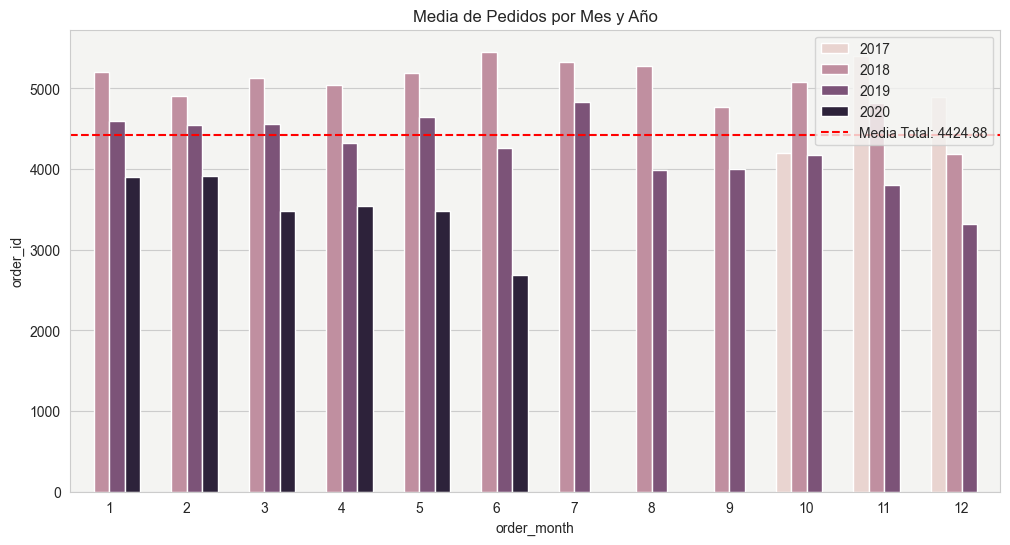

In [188]:
#grafico de barras de la media de pedidos por mes y por año indicando la curva de la media total sobre el periodo completo
media_pedidos_mes_año = df_full.groupby(['order_year', 'order_month'])['order_id'].nunique().reset_index()

# Aseguramos que order_date sea datetime para evitar TypeError al restar strings
if df_full['order_date'].dtype == 'object':
	df_full['order_date'] = pd.to_datetime(df_full['order_date'], errors='coerce')

# calculamos la media total mensual sobre el periodo; evitamos división por cero
date_min = df_full['order_date'].min()
date_max = df_full['order_date'].max()
days_span = (date_max - date_min).days if pd.notnull(date_min) and pd.notnull(date_max) else 0
if days_span == 0:
	media_total = round(df_full['order_id'].nunique(), 2)
else:
	media_total = round(df_full['order_id'].nunique() / days_span * 30, 2)

plt.figure(figsize=(12, 6))
sns.barplot(x='order_month', y='order_id', hue='order_year', data=media_pedidos_mes_año)
plt.axhline(media_total, color='red', linestyle='--', label=f'Media Total: {media_total}')
plt.title('Media de Pedidos por Mes y Año')
plt.legend()
plt.savefig('../Outputs/media_pedidos_mes_año.png')
plt.show()




C:\Users\sebas\AppData\Local\Temp\ipykernel_16320\2388964524.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sns.barplot(x='order_day', y='order_id', data=df_full.groupby('order_day')['order_id'].nunique().reset_index())


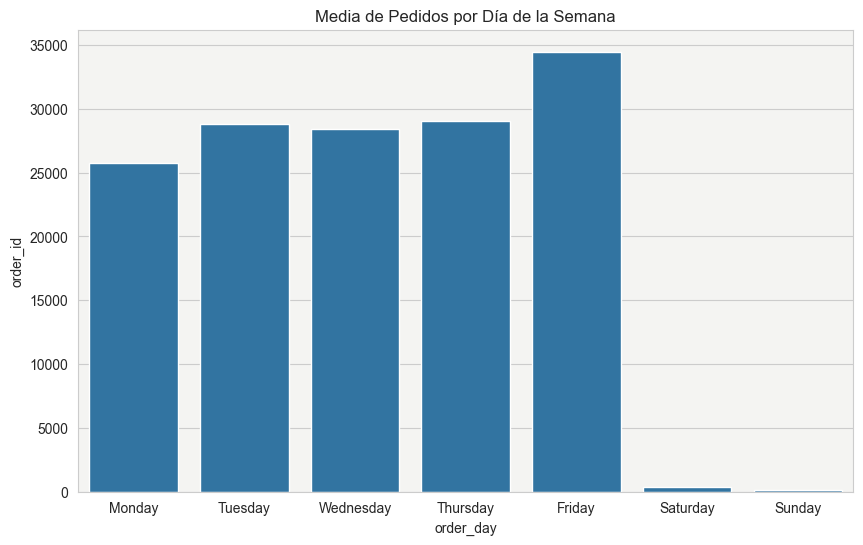

In [189]:
#grafico de barras de la media de pedidos por dia de la semana con orden de lunes a domingo
order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df_full['order_day'] = pd.Categorical(df_full['order_day'], categories=order, ordered=True)
plt.figure(figsize=(10, 6))
sns.barplot(x='order_day', y='order_id', data=df_full.groupby('order_day')['order_id'].nunique().reset_index())
plt.title('Media de Pedidos por Día de la Semana')
plt.savefig('../Outputs/media_pedidos_dia_semana.png')
plt.show()

media de cantidad vendida por pedido

In [190]:

#media de cantidad vendida por pedido redondeado a 2 decimales en 2017
media_cantidad_vendida_2017 = round(df_full[df_full['order_year'] == 2017]['sales_qty'].mean(), 2)
print("Media de cantidad vendida por pedido en 2017:", media_cantidad_vendida_2017)
#media de cantidad vendida por pedido redondeado a 2 decimales en 2018
media_cantidad_vendida_2018 = round(df_full[df_full['order_year'] == 2018]['sales_qty'].mean(), 2)
print("Media de cantidad vendida por pedido en 2018:", media_cantidad_vendida_2018)
#media de cantidad vendida por pedido redondeado a 2 decimales en 2019
media_cantidad_vendida_2019 = round(df_full[df_full['order_year'] == 2019]['sales_qty'].mean(), 2)
print("Media de cantidad vendida por pedido en 2019:", media_cantidad_vendida_2019)
#media de cantidad vendida por pedido redondeado a 2 decimales en 2020
media_cantidad_vendida_2020 = round(df_full[df_full['order_year'] == 2020]['sales_qty'].mean(), 2)
print("Media de cantidad vendida por pedido en 2020:", media_cantidad_vendida_2020)
#moda de cantidad vendida por pedido en 2017
moda_cantidad_vendida_2017 = df_full[df_full['order_year'] == 2017]['sales_qty'].mode()[0]
print("Moda de cantidad vendida por pedido en 2017:", moda_cantidad_vendida_2017)
#moda de cantidad vendida por pedido en 2018
moda_cantidad_vendida_2018 = df_full[df_full['order_year'] == 2018]['sales_qty'].mode()[0]
print("Moda de cantidad vendida por pedido en 2018:", moda_cantidad_vendida_2018)
#moda de cantidad vendida por pedido en 2019
moda_cantidad_vendida_2019 = df_full[df_full['order_year'] == 2019]['sales_qty'].mode()[0]
print("Moda de cantidad vendida por pedido en 2019:", moda_cantidad_vendida_2019)
#moda de cantidad vendida por pedido en 2020
moda_cantidad_vendida_2020 = df_full[df_full['order_year'] == 2020]['sales_qty'].mode()[0]
print("Moda de cantidad vendida por pedido en 2020:", moda_cantidad_vendida_2020)


Media de cantidad vendida por pedido en 2017: 16.06
Media de cantidad vendida por pedido en 2018: 16.39
Media de cantidad vendida por pedido en 2019: 16.54
Media de cantidad vendida por pedido en 2020: 16.62
Moda de cantidad vendida por pedido en 2017: 1
Moda de cantidad vendida por pedido en 2018: 1
Moda de cantidad vendida por pedido en 2019: 1
Moda de cantidad vendida por pedido en 2020: 1


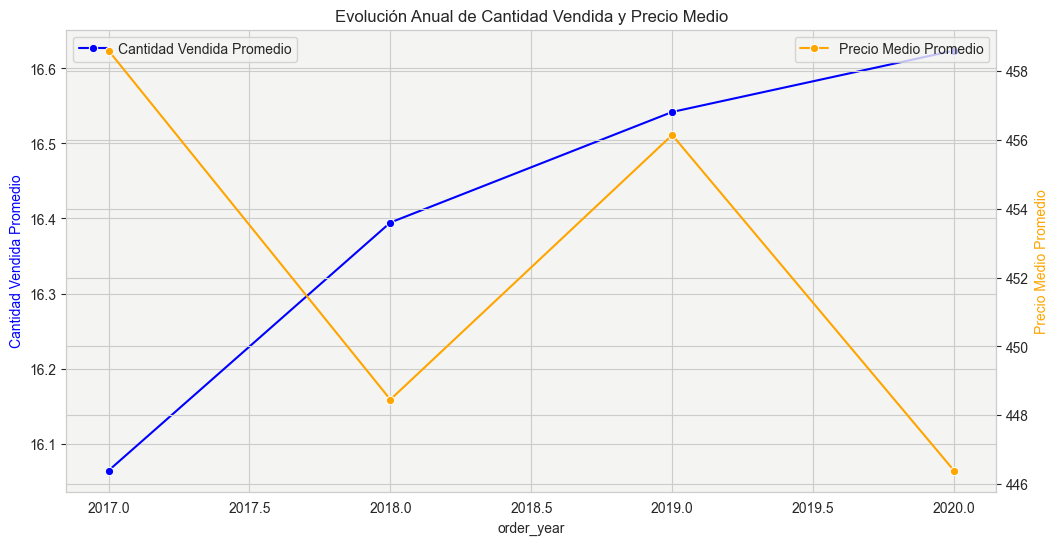

In [191]:
#grafico de linea de la cantidad vendida por pedido por años (coordinada x a la izquierda) 
# combinado con grafico de linea de la evolucion del precio de la media de average_sales_price por años (coordinada x a la derecha)
fig, ax1 = plt.subplots(figsize=(12, 6))
ax2 = ax1.twinx()
cantidad_vendida_anual = df_full.groupby('order_year')['sales_qty'].mean().reset_index()
precio_medio_anual = df_full.groupby('order_year')['average_sales_price'].mean().reset_index()
sns.lineplot(x='order_year', y='sales_qty', data=cantidad_vendida_anual, marker='o', ax=ax1, color='blue', label='Cantidad Vendida Promedio')
sns.lineplot(x='order_year', y='average_sales_price', data=precio_medio_anual, marker='o', ax=ax2, color='orange', label='Precio Medio Promedio')
ax1.set_ylabel('Cantidad Vendida Promedio', color='blue')
ax2.set_ylabel('Precio Medio Promedio', color='orange')
plt.title('Evolución Anual de Cantidad Vendida y Precio Medio')
plt.savefig('../Outputs/evolucion_cantidad_vendida_precio_medio.png')
plt.show()



Precio medio por pedido

In [192]:

#media de importe de ventas por pedido redondeado a 2 decimales
media_importe_ventas = round(df_full['sales_amount'].mean(), 2)
print("Media de importe de ventas por pedido:", media_importe_ventas)
#media de importe de ventas por pedido en 2017 redondeado a 2 decimales
media_importe_ventas_2017 = round(df_full[df_full['order_year'] == 2017]['sales_amount'].mean(), 2)
print("Media de importe de ventas por pedido en 2017:", media_importe_ventas_2017)
#media de importe de ventas por pedido en 2018 redondeado a 2 decimales
media_importe_ventas_2018 = round(df_full[df_full['order_year'] == 2018]['sales_amount'].mean(), 2)
print("Media de importe de ventas por pedido en 2018:", media_importe_ventas_2018)
#media de importe de ventas por pedido en 2019 redondeado a 2 decimales
media_importe_ventas_2019 = round(df_full[df_full['order_year'] == 2019]['sales_amount'].mean(), 2)
print("Media de importe de ventas por pedido en 2019:", media_importe_ventas_2019)
#media de importe de ventas por pedido en 2020 redondeado a 2 decimales
media_importe_ventas_2020 = round(df_full[df_full['order_year'] == 2020]['sales_amount'].mean(), 2)
print("Media de importe de ventas por pedido en 2020:", media_importe_ventas_2020)
#media de precio medio de venta por pedido redondeado a 2 decimales
media_precio_medio_venta = round(df_full['average_sales_price'].mean(), 2)
print("Media de precio medio de venta por pedido:", media_precio_medio_venta)
#media de precio medio de venta por pedido en 2017 redondeado a 2 decimales
media_precio_medio_venta_2017 = round(df_full[df_full['order_year'] == 2017]['average_sales_price'].mean(), 2)
print("Media de precio medio de venta por pedido en 2017:", media_precio_medio_venta_2017)
#media de precio medio de venta por pedido en 2018 redondeado a 2 decimales
media_precio_medio_venta_2018 = round(df_full[df_full['order_year'] == 2018]['average_sales_price'].mean(), 2)
print("Media de precio medio de venta por pedido en 2018:", media_precio_medio_venta_2018)
#media de precio medio de venta por pedido en 2019 redondeado a 2 decimales
media_precio_medio_venta_2019 = round(df_full[df_full['order_year'] == 2019]['average_sales_price'].mean(), 2)
print("Media de precio medio de venta por pedido en 2019:", media_precio_medio_venta_2019)
#media de precio medio de venta por pedido en 2020 redondeado a 2 decimales
media_precio_medio_venta_2020 = round(df_full[df_full['order_year'] == 2020]['average_sales_price'].mean(), 2)
print("Media de precio medio de venta por pedido en 2020:", media_precio_medio_venta_2020)






Media de importe de ventas por pedido: 6555.34
Media de importe de ventas por pedido en 2017: 6156.4
Media de importe de ventas por pedido en 2018: 6663.59
Media de importe de ventas por pedido en 2019: 6487.0
Media de importe de ventas por pedido en 2020: 6685.55
Media de precio medio de venta por pedido: 451.83
Media de precio medio de venta por pedido en 2017: 458.6
Media de precio medio de venta por pedido en 2018: 448.45
Media de precio medio de venta por pedido en 2019: 456.14
Media de precio medio de venta por pedido en 2020: 446.39


Restaurantes, tipo de cocina y valoracion


In [193]:
#contamos la cantidad de restaurantes por cada categoria de cocina de forma descendente
cantidad_restaurantes_categoria = df_full.groupby('cuisine_category')['r_id'].nunique().sort_values(ascending=False)
print("Cantidad de restaurantes por categoría de cocina:\n", cantidad_restaurantes_categoria)


Cantidad de restaurantes por categoría de cocina:
 cuisine_category
Indian              55238
Asian               35878
Desserts            16857
Fast Food           16217
Italian             14129
Beverage             4568
American             1200
Middle Eastern        913
Healthy               613
European              607
Mexican               306
Fish and Seafood      120
Japanese               87
Other                  52
Name: r_id, dtype: int64


In [194]:

#contamos la cantidad rstaurante por ciudad de forma descendente
cantidad_restaurantes_ciudad = df_full.groupby('city')['r_id'].nunique().sort_values(ascending=False)
print("Cantidad de restaurantes por ciudad:\n", cantidad_restaurantes_ciudad)


Cantidad de restaurantes por ciudad:
 city
Bangalore     14669
Delhi         13799
Pune          12340
Hyderabad      9899
Chennai        9871
              ...  
Naharlagun        1
Kohima            1
Rangpo            1
Hampi             1
Darjeeling        1
Name: r_id, Length: 552, dtype: int64


In [196]:

#calculamos el promedio de rating de los restaurantes redondeado a 2 decimales
promedio_rating = round(df_full['rating'].mean(), 2)
print("Promedio de rating de los restaurantes:", promedio_rating)
#contamos el promedio de rating por categoria de cocina redondeado a 2 decimales
promedio_rating_categoria = round(df_full.groupby('cuisine_category')['rating'].mean(), 2).sort_values(ascending=False)
print("Promedio de rating por categoría de cocina:\n", promedio_rating_categoria)
#contamos el promedio de rating por ciudad redondeado a 2 decimales
promedio_rating_ciudad = round(df_full.groupby('city')['rating'].mean(), 2).sort_values(ascending=False)
print("Promedio de rating por ciudad:\n", promedio_rating_ciudad)


Promedio de rating de los restaurantes: 3.9
Promedio de rating por categoría de cocina:
 cuisine_category
Japanese            4.24
Healthy             4.17
Desserts            4.14
Mexican             4.05
Other               4.01
American            4.01
Beverage            4.00
European            3.98
Fast Food           3.98
Fish and Seafood    3.95
Middle Eastern      3.84
Indian              3.84
Italian             3.83
Asian               3.82
Name: rating, dtype: float64
Promedio de rating por ciudad:
 city
Chopda              4.82
Kumta               4.80
Kadayanallur        4.53
Dhanbad             4.40
Fatehgarh-sahib     4.34
                    ... 
Nipani               NaN
Puttur               NaN
Rangpo               NaN
Sangamner            NaN
Tarn-taran-sahib     NaN
Name: rating, Length: 552, dtype: float64


In [199]:
#contamos la cantidad de restaurante por rating_count con la ordenacion ascendente
cantidad_restaurantes_rating_count = df_full.groupby('rating_count')['r_id'].nunique().sort_index()
print("Cantidad de restaurantes por rating_count:\n", cantidad_restaurantes_rating_count)



Cantidad de restaurantes por rating_count:
 rating_count
100+ ratings       20327
10K+ ratings          15
1K+ ratings         2702
20+ ratings        21406
50+ ratings        11873
500+ ratings        4352
5K+ ratings           97
Too Few Ratings    86013
Name: r_id, dtype: int64


Perfil de usuarios

In [203]:
#edad minima y maxima de los usuarios en df_final
edad_minima = df_full['age'].min()
edad_maxima = df_full['age'].max()
print("Edad mínima de los usuarios:", edad_minima)
print("Edad máxima de los usuarios:", edad_maxima)
#media de edad de los usuarios redondeado a 2 decimales
media_edad = round(df_full['age'].mean(), 2)
print("Media de edad de los usuarios:", media_edad)
#moda de edad de los usuarios
moda_edad = df_full['age'].mode()[0]
print("Moda de edad de los usuarios:", moda_edad)
#cantidad de usuarios por ocupacion de forma descendente
cantidad_usuarios_ocupacion = df_full.groupby('occupation')['user_id'].nunique().sort_values(ascending=False)
print("Cantidad de usuarios por ocupación:\n", cantidad_usuarios_ocupacion)
#percentaje de usuarios por ocupacion de forma descendente
cantidad_usuarios_ocupacion = df_full.groupby('occupation')['user_id'].nunique()
percentaje_usuarios_ocupacion = round((cantidad_usuarios_ocupacion / df_full['user_id'].nunique()) * 100, 2).sort_values(ascending=False)
print("Porcentaje de usuarios por ocupación:\n", percentaje_usuarios_ocupacion)
#media de edad por ocupacion redondeado a 2 decimales
media_edad_ocupacion = round(df_full.groupby('occupation')['age'].mean(), 2).sort_values(ascending=False)
print("Media de edad por ocupación:\n", media_edad_ocupacion)
#percentaje de usuarios por estado civil de forma descendente
cantidad_usuarios_estado_civil = df_full.groupby('marital status')['user_id'].nunique()
percentaje_usuarios_estado_civil = round((cantidad_usuarios_estado_civil / df_full['user_id'].nunique()) * 100, 2).sort_values(ascending=False)
print("Porcentaje de usuarios por estado civil:\n", percentaje_usuarios_estado_civil)


#percentaje de usuarios por genero
cantidad_usuarios_genero = df_full.groupby('gender')['user_id'].nunique()
percentaje_usuarios_genero = round((cantidad_usuarios_genero / df_full['user_id'].nunique()) * 100, 2)
print("Porcentaje de usuarios por género:\n", percentaje_usuarios_genero)




Edad mínima de los usuarios: 18
Edad máxima de los usuarios: 33
Media de edad de los usuarios: 24.63
Moda de edad de los usuarios: 23
Cantidad de usuarios por ocupación:
 occupation
Student           41169
Employee          23499
Self Employeed    10751
House wife         1783
Name: user_id, dtype: int64
Porcentaje de usuarios por ocupación:
 occupation
Student           53.33
Employee          30.44
Self Employeed    13.93
House wife         2.31
Name: user_id, dtype: float64
Media de edad por ocupación:
 occupation
House wife        30.30
Employee          26.57
Self Employeed    26.39
Student           22.82
Name: age, dtype: float64
Porcentaje de usuarios por estado civil:
 marital status
Single               68.98
Married              27.94
Prefer not to say     3.08
Name: user_id, dtype: float64
Porcentaje de usuarios por género:
 gender
Female    42.78
Male      57.22
Name: user_id, dtype: float64
